### Gemstone-price-prediction
##### Reading dataset
##### Missing value analysis
##### Transformation of dates
##### Univariate Analysis
##### Analysing numerical columns
#####  Outliers
##### Bivariate analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

####  Reading training data

In [2]:
cubic_data=pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\INTERNSHIP\cubic_zirconia.csv")
cubic_data.head()

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779

In [3]:
cubic_data.shape

(26967, 11)

In [4]:
cubic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
cubic_data.describe()

Unnamed: 0         carat         depth         table             x  \
count  26967.000000  26967.000000  26270.000000  26967.000000  26967.000000   
mean   13484.000000      0.798375     61.745147     57.456080      5.729854   
std     7784.846691      0.477745      1.412860      2.232068      1.128516   
min        1.000000      0.200000     50.800000     49.000000      0.000000   
25%     6742.500000      0.400000     61.000000     56.000000      4.710000   
50%    13484.000000      0.700000     61.800000     57.000000      5.690000   
75%    20225.500000      1.050000     62.500000     59.000000      6.550000   
max    26967.000000      4.500000     73.600000     79.000000     10.230000   

                  y             z         price  
count  26967.000000  26967.000000  26967.000000  
mean       5.733569      3.538057   3939.518115  
std        1.166058      0.720624   4024.864666  
min        0.000000      0.000000    326.000000  
25%        4.710000      2.900000    945.000000  
50%        5.710000      3.520000   2375.000000  
75%        6.540000      4.040000   5360.000000  
max       58.900000     31.800000  18818.000000

In [6]:
#We can remove column unnamed as it is serial number
cubic_data1=cubic_data.drop('Unnamed: 0',axis=1)

In [7]:
cubic_data1.head()

carat        cut color clarity  depth  table     x     y     z  price
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779

In [8]:
#Checking for missing value
cubic_data1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [9]:
cubic_data1.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
price    2375.00
dtype: float64

In [10]:
#Treating missing value
#Imputing with median
cubic_data1= cubic_data1.fillna(cubic_data1.median())

In [11]:
cubic_data1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
#checking for duplictes
dup = cubic_data1.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 34


In [13]:
#Droping duplicted rows
cubic_data1.drop_duplicates(inplace=True) 

In [14]:
cubic_data1.shape

(26933, 10)

### Data Analysis

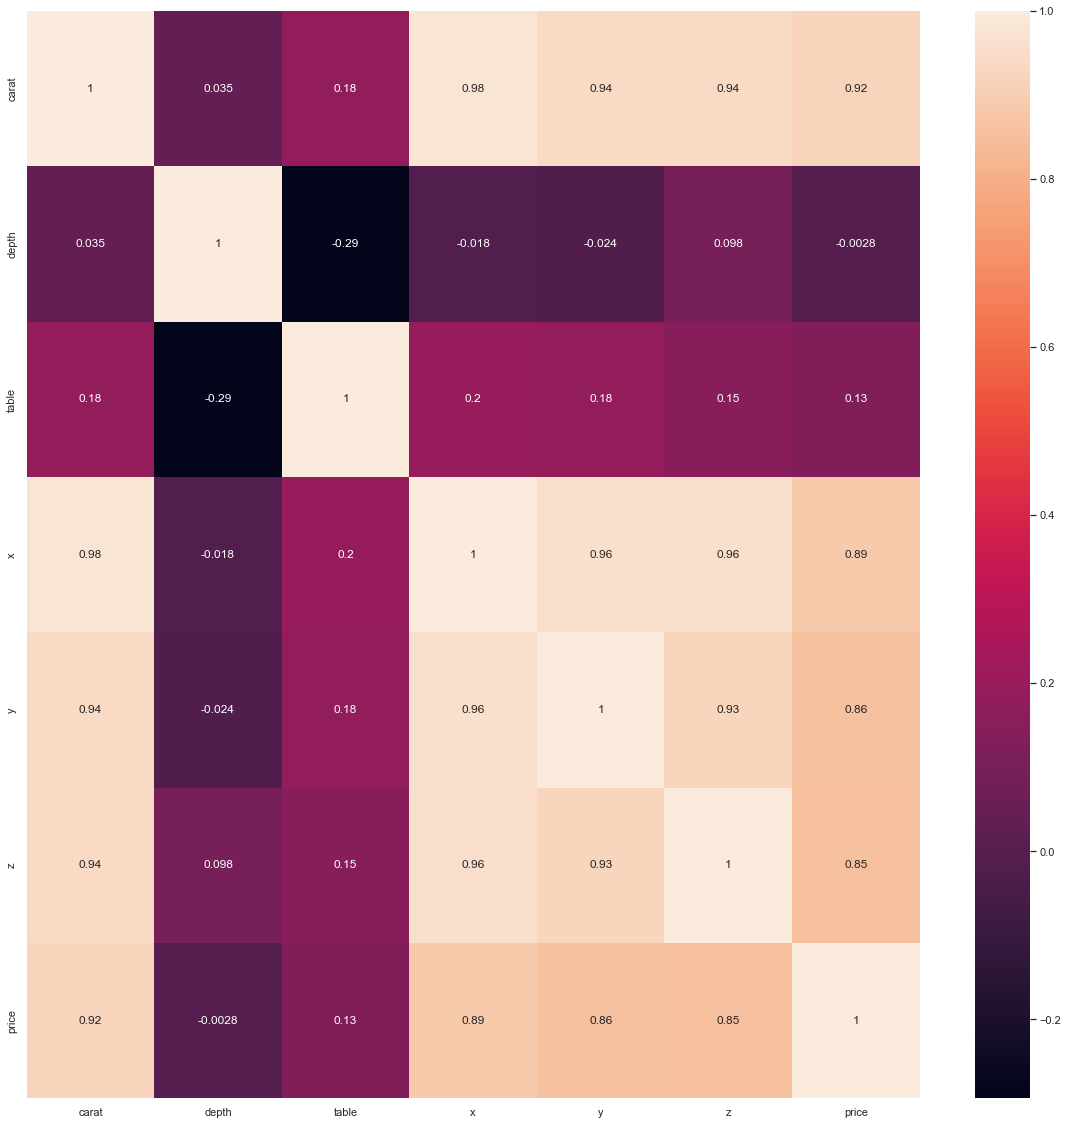

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cubic_data1.corr(), annot = True, ax = ax)
plt.show()

### Carat

<AxesSubplot:xlabel='carat'>

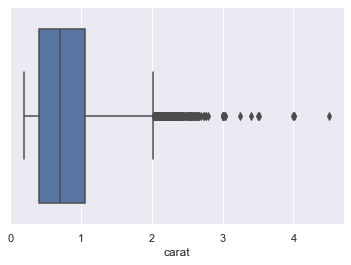

In [16]:
sns.boxplot(cubic_data1.carat)

##### Presence of outliers


In [17]:
#Outlier treatment
IQR=cubic_data1.carat.quantile(0.75)-cubic_data1.carat.quantile(0.25)
lower_bridge=cubic_data1.carat.quantile(0.25)-(IQR*1.5)
upper_bridge=cubic_data1.carat.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.5750000000000001 2.0250000000000004


In [18]:
cubic_data1.loc[cubic_data1['carat']>=2.025,'carat']=2.025
cubic_data1.loc[cubic_data1['carat']<=-0.57,'carat']=-0.57

<AxesSubplot:xlabel='carat'>

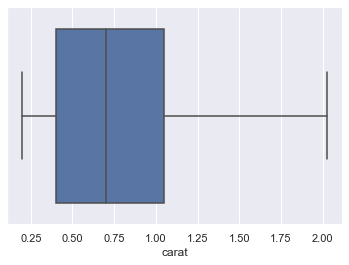

In [19]:
sns.boxplot(cubic_data1.carat)

### Depth

<AxesSubplot:xlabel='depth'>

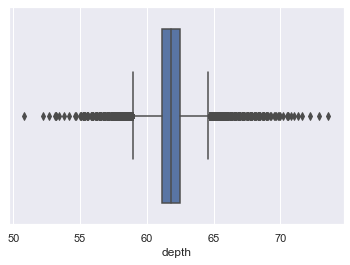

In [20]:
sns.boxplot(cubic_data1.depth)

In [21]:
#Outlier treatment
IQR=cubic_data1.depth.quantile(0.75)-cubic_data1.depth.quantile(0.25)
lower_bridge=cubic_data1.depth.quantile(0.25)-(IQR*1.5)
upper_bridge=cubic_data1.depth.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

59.0 64.6


In [22]:
cubic_data1.loc[cubic_data1['depth']>=64.6,'depth']=64.6
cubic_data1.loc[cubic_data1['depth']<=59.0,'depth']=59.0

<AxesSubplot:xlabel='depth'>

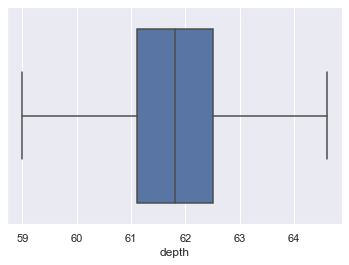

In [23]:
sns.boxplot(cubic_data1.depth)

### Table

<AxesSubplot:xlabel='table'>

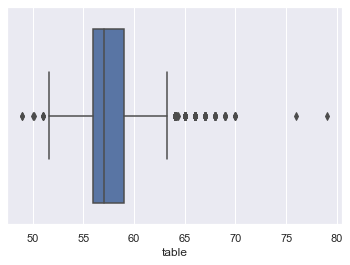

In [24]:
sns.boxplot(cubic_data1.table)

In [25]:
#Outlier treatment
IQR=cubic_data1.table.quantile(0.75)-cubic_data1.table.quantile(0.25)
lower_bridge=cubic_data1.table.quantile(0.25)-(IQR*1.5)
upper_bridge=cubic_data1.table.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

51.5 63.5


In [26]:
cubic_data1.loc[cubic_data1['table']>=63.5,'table']=63.5
cubic_data1.loc[cubic_data1['table']<=51.5,'table']=51.5

<AxesSubplot:xlabel='depth'>

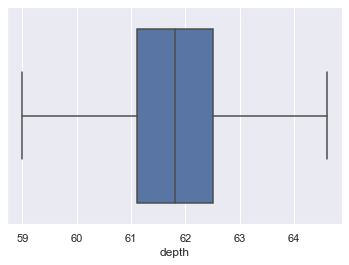

In [27]:
sns.boxplot(cubic_data1.depth)

### x

<AxesSubplot:xlabel='x'>

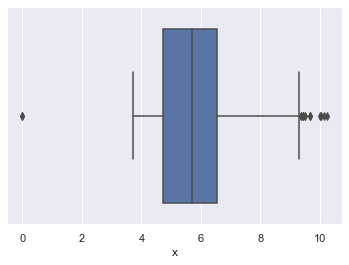

In [28]:
sns.boxplot(cubic_data1.x)

In [29]:
#Outlier treatment
IQR=cubic_data1.x.quantile(0.75)-cubic_data1.x.quantile(0.25)
lower_bridge=cubic_data1.x.quantile(0.25)-(IQR*1.5)
upper_bridge=cubic_data1.x.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.9500000000000002 9.309999999999999


In [30]:
cubic_data1.loc[cubic_data1['x']>=9.30,'x']=9.30
cubic_data1.loc[cubic_data1['x']<=1.95,'x']=1.95

<AxesSubplot:xlabel='x'>

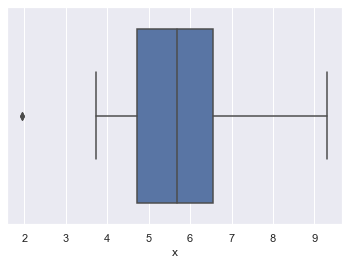

In [31]:
sns.boxplot(cubic_data1.x)

### y

<AxesSubplot:xlabel='y'>

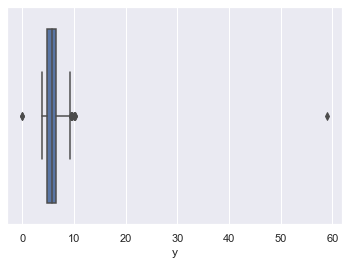

In [32]:
sns.boxplot(cubic_data1.y)

In [33]:
#Outlier treatment
IQR=cubic_data1.y.quantile(0.75)-cubic_data1.y.quantile(0.25)
lower_bridge=cubic_data1.y.quantile(0.25)-(IQR*1.5)
upper_bridge=cubic_data1.y.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.9649999999999999 9.285


In [36]:
cubic_data1.loc[cubic_data1['y']>=9.285,'y']=9.285
cubic_data1.loc[cubic_data1['y']<=1.964,'y']=1.964

<AxesSubplot:xlabel='y'>

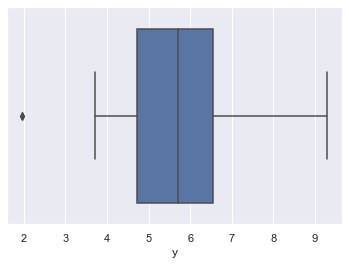

In [38]:
sns.boxplot(cubic_data1.y)

### Z

<AxesSubplot:xlabel='z'>

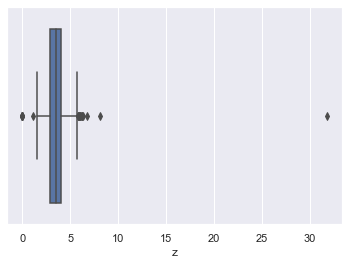

In [39]:
sns.boxplot(cubic_data1.z)

In [41]:
#Outlier treatment
IQR=cubic_data1.z.quantile(0.75)-cubic_data1.z.quantile(0.25)
lower_bridge=cubic_data1.z.quantile(0.25)-(IQR*1.5)
upper_bridge=cubic_data1.z.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.1899999999999997 5.75


In [42]:
cubic_data1.loc[cubic_data1['z']>=5.75,'z']=5.75
cubic_data1.loc[cubic_data1['z']<=1.18,'z']=1.18

<AxesSubplot:xlabel='z'>

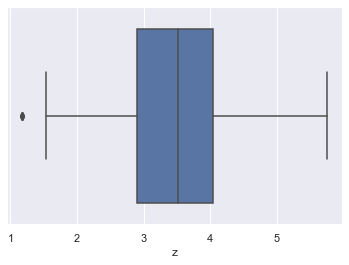

In [43]:
sns.boxplot(cubic_data1.z)

<AxesSubplot:xlabel='price', ylabel='Density'>

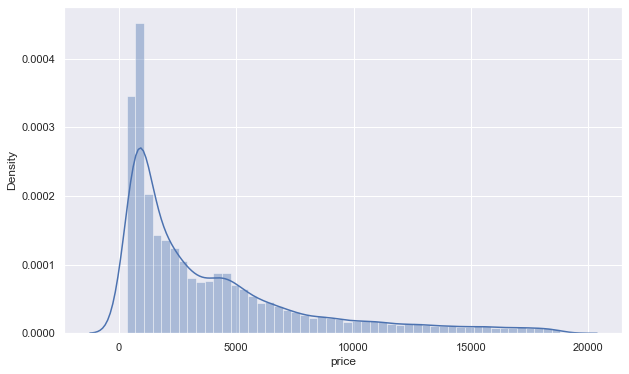

In [44]:
#Lets check the distribution of price
plt.figure(figsize = (10,6))
sns.distplot(cubic_data1['price'])

##### From the figure it is clear that it is positivly distributed.

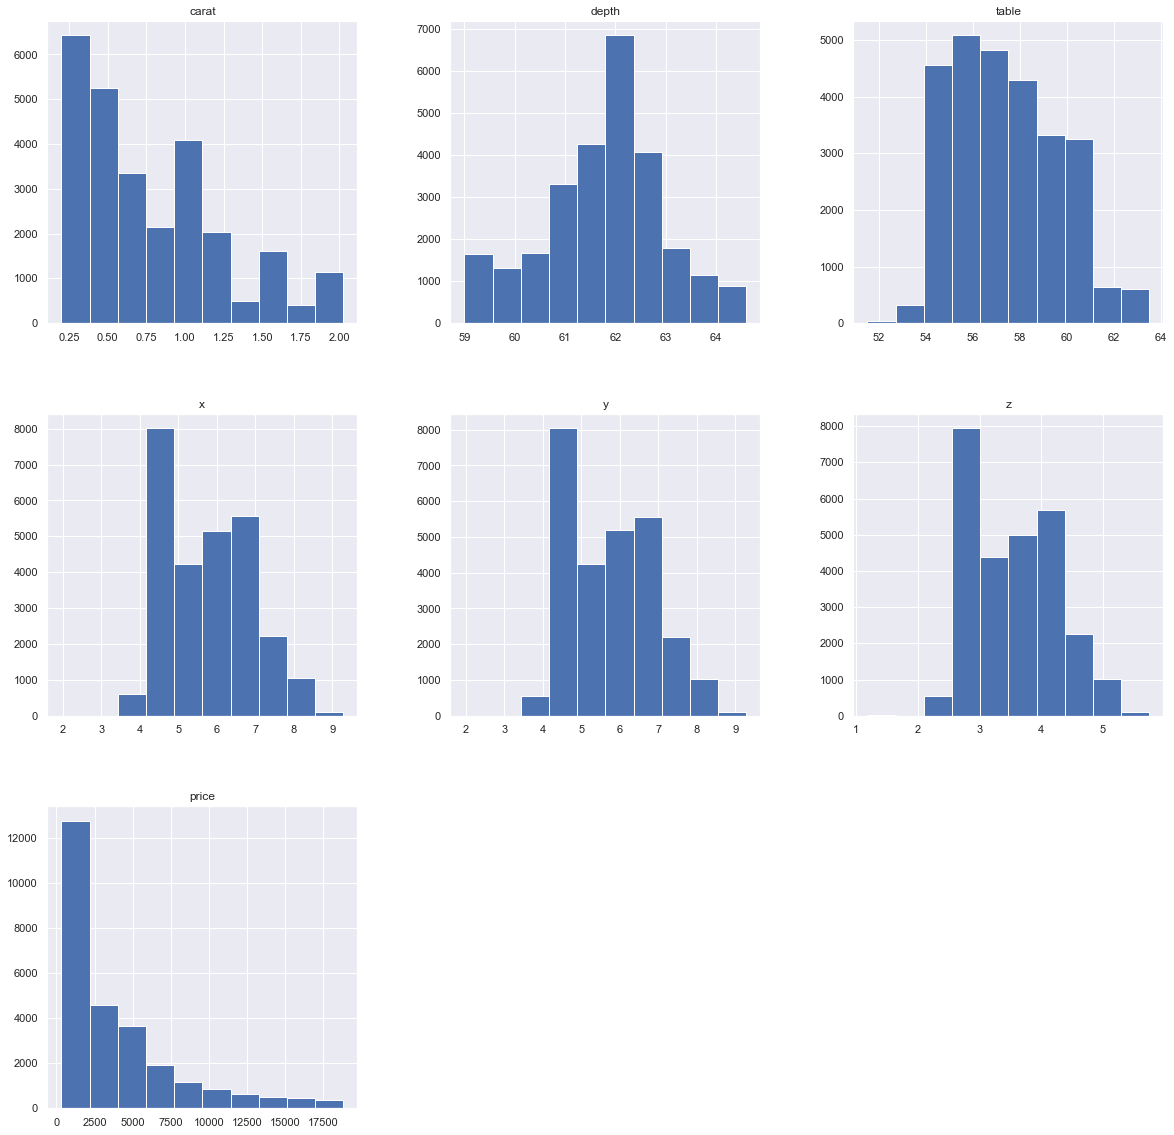

In [46]:

cubic_data1.hist(figsize=(20,20))
plt.show()

###### Carat and price are skewed towards right.

##### Categorical columns

##### CUT

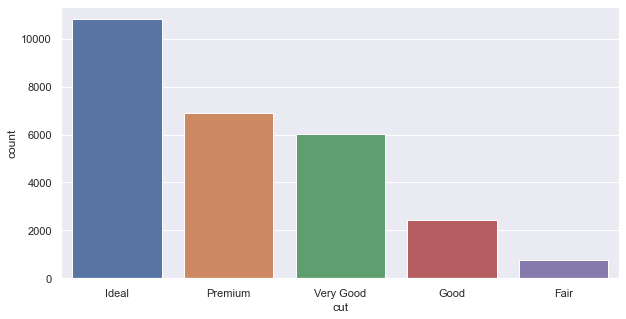

In [47]:


plt.figure(figsize = (10,5))
sns.countplot('cut',data = cubic_data1, order = cubic_data1['cut'].value_counts().index)
plt.show()

##### From the figure it is understood Ideal is having the highest count followed by premium and least count is for fair.

##### Color

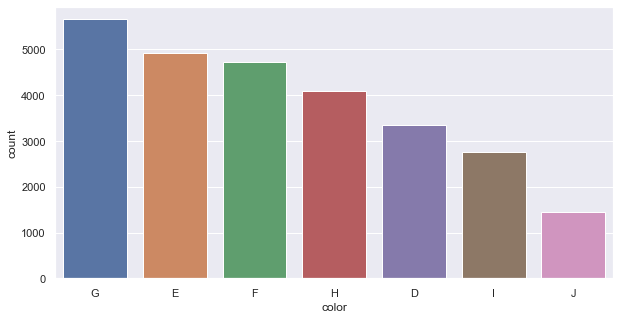

In [48]:
plt.figure(figsize = (10,5))
sns.countplot('color',data = cubic_data1, order = cubic_data1['color'].value_counts().index)
plt.show()

##### From the figure it is understood G is having the highest count followed by E and least count is for J.

##### calarity

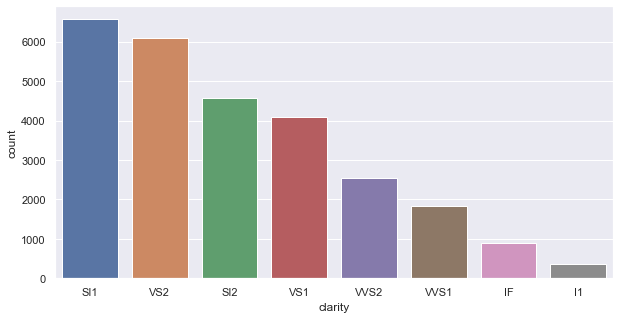

In [49]:
plt.figure(figsize = (10,5))
sns.countplot('clarity',data = cubic_data1, order = cubic_data1['clarity'].value_counts().index)
plt.show()

###### From the figure it is understood SI 1 is having the highest count followed by VS 2 and least count is for I1.

<AxesSubplot:xlabel='price', ylabel='cut'>

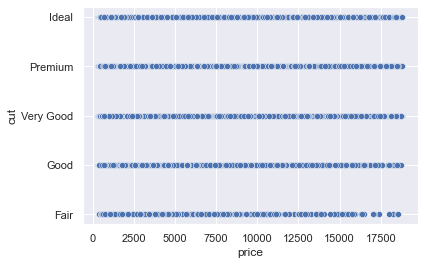

In [51]:
sns.scatterplot(cubic_data1["price"], cubic_data1["cut"])

<AxesSubplot:xlabel='price', ylabel='color'>

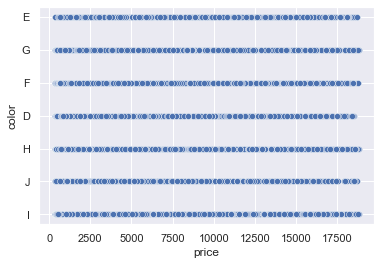

In [52]:
sns.scatterplot(cubic_data1["price"], cubic_data1["color"])

<AxesSubplot:xlabel='price', ylabel='clarity'>

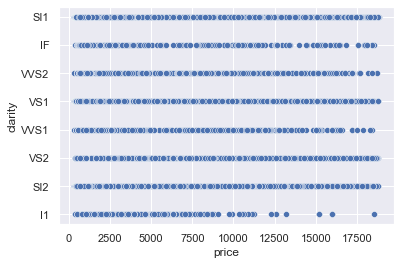

In [53]:
sns.scatterplot(cubic_data1["price"], cubic_data1["clarity"])

<AxesSubplot:xlabel='price', ylabel='carat'>

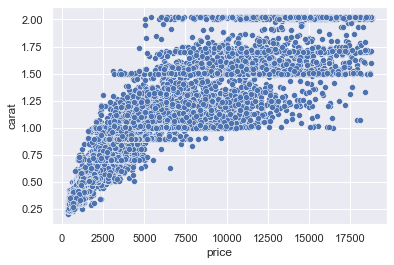

In [54]:
sns.scatterplot(cubic_data1["price"], cubic_data1["carat"])

<AxesSubplot:xlabel='price', ylabel='depth'>

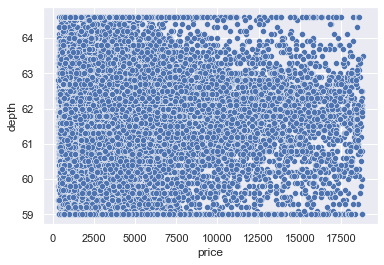

In [55]:
sns.scatterplot(cubic_data1["price"], cubic_data1["depth"])

<AxesSubplot:xlabel='price', ylabel='table'>

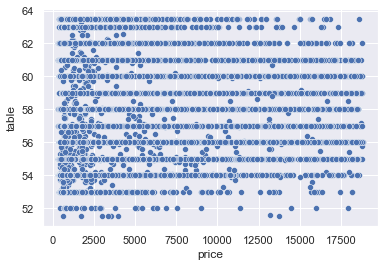

In [56]:
sns.scatterplot(cubic_data1["price"], cubic_data1["table"])

<AxesSubplot:xlabel='price', ylabel='x'>

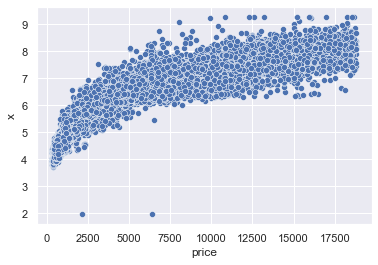

In [57]:
sns.scatterplot(cubic_data1["price"], cubic_data1["x"])

<AxesSubplot:xlabel='price', ylabel='y'>

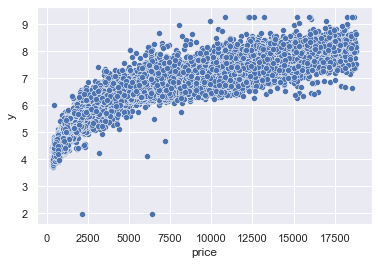

In [58]:
sns.scatterplot(cubic_data1["price"], cubic_data1["y"])

<AxesSubplot:xlabel='price', ylabel='z'>

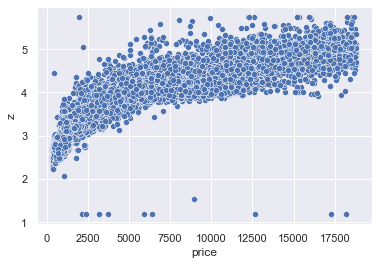

In [59]:
sns.scatterplot(cubic_data1["price"], cubic_data1["z"])

<AxesSubplot:xlabel='price', ylabel='cut'>

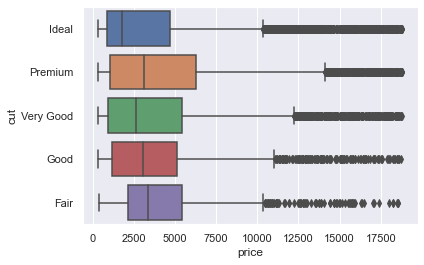

In [61]:
sns.boxplot(cubic_data1['price'], cubic_data1["cut"])

<AxesSubplot:xlabel='price', ylabel='color'>

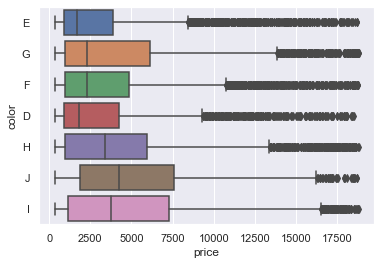

In [62]:
sns.boxplot(cubic_data1['price'], cubic_data1["color"])

<AxesSubplot:xlabel='price', ylabel='clarity'>

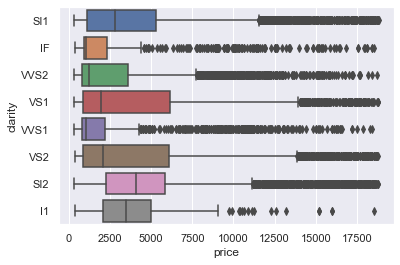

In [63]:
sns.boxplot(cubic_data1['price'], cubic_data1["clarity"])

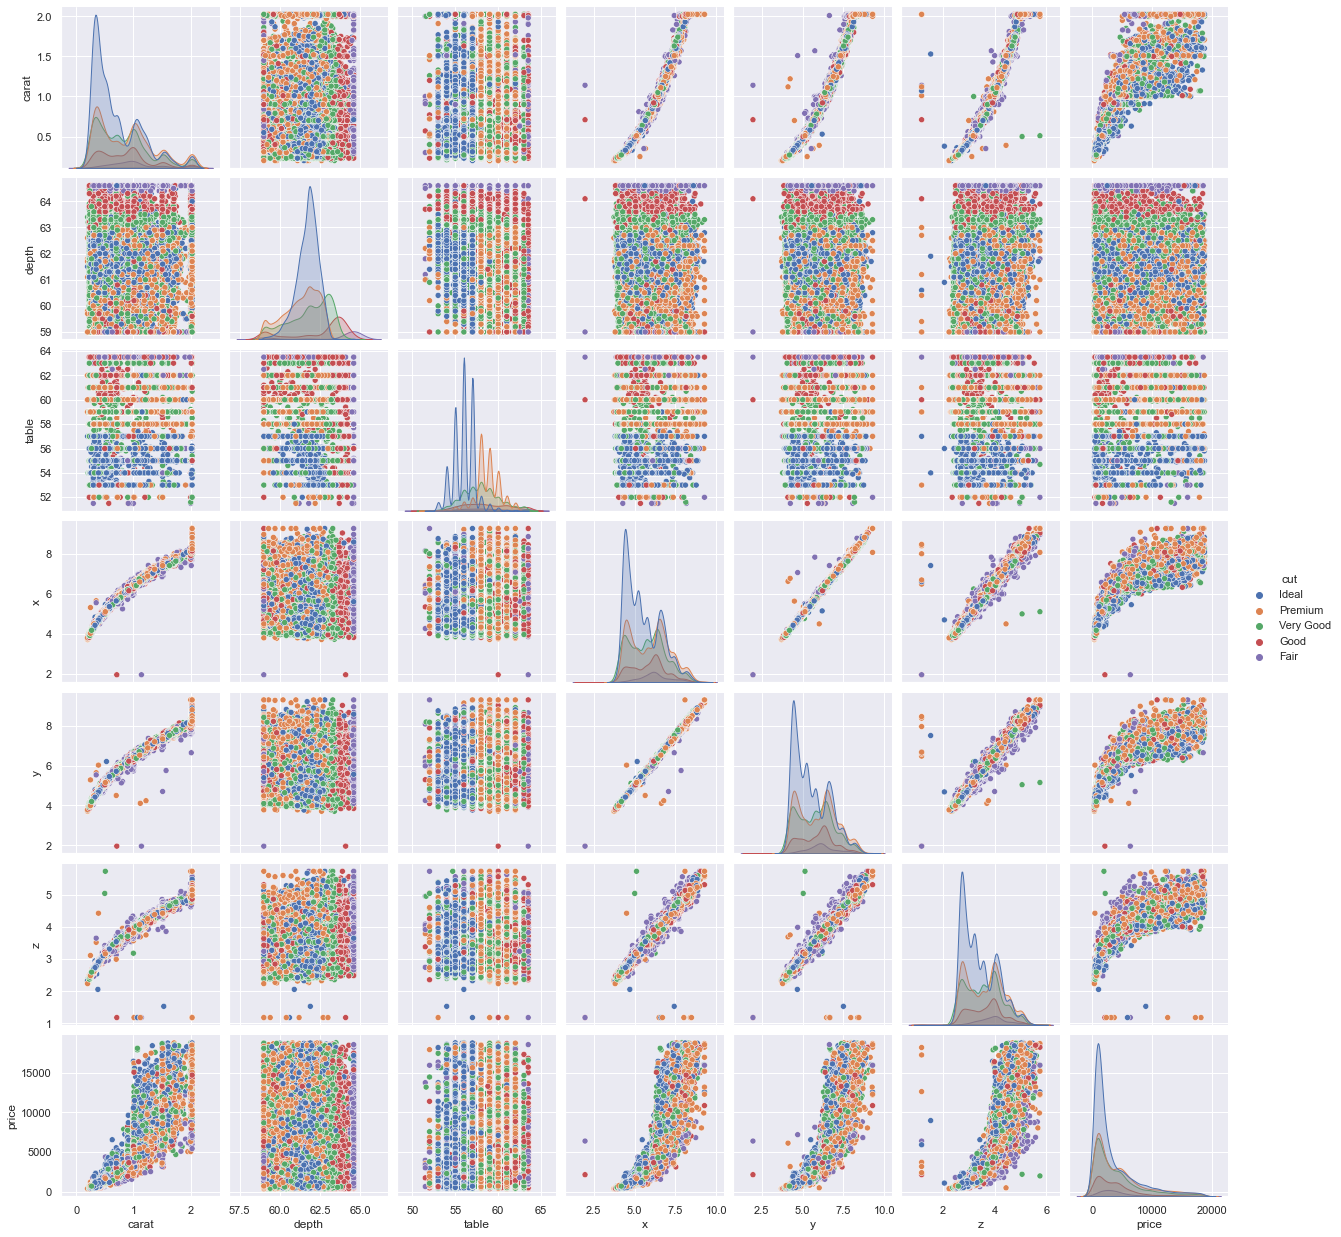

In [66]:
sns.pairplot(cubic_data1, hue = 'cut')
plt.show()

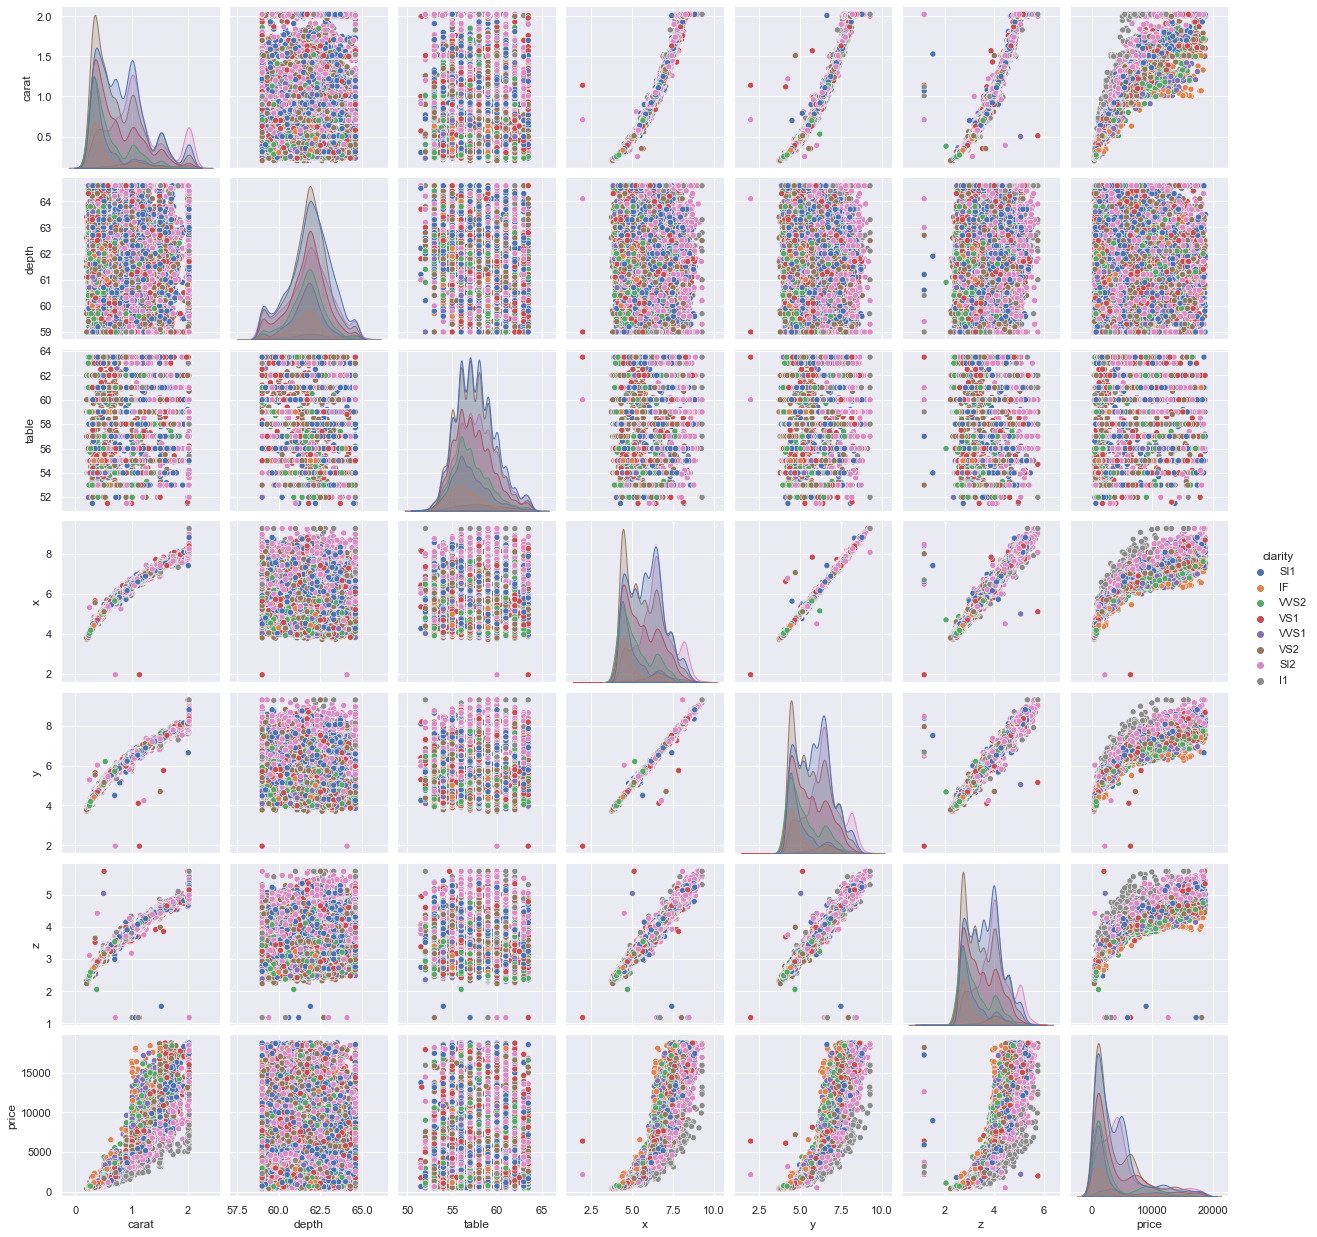

In [75]:
sns.pairplot(cubic_data1, hue = 'clarity')
plt.show()

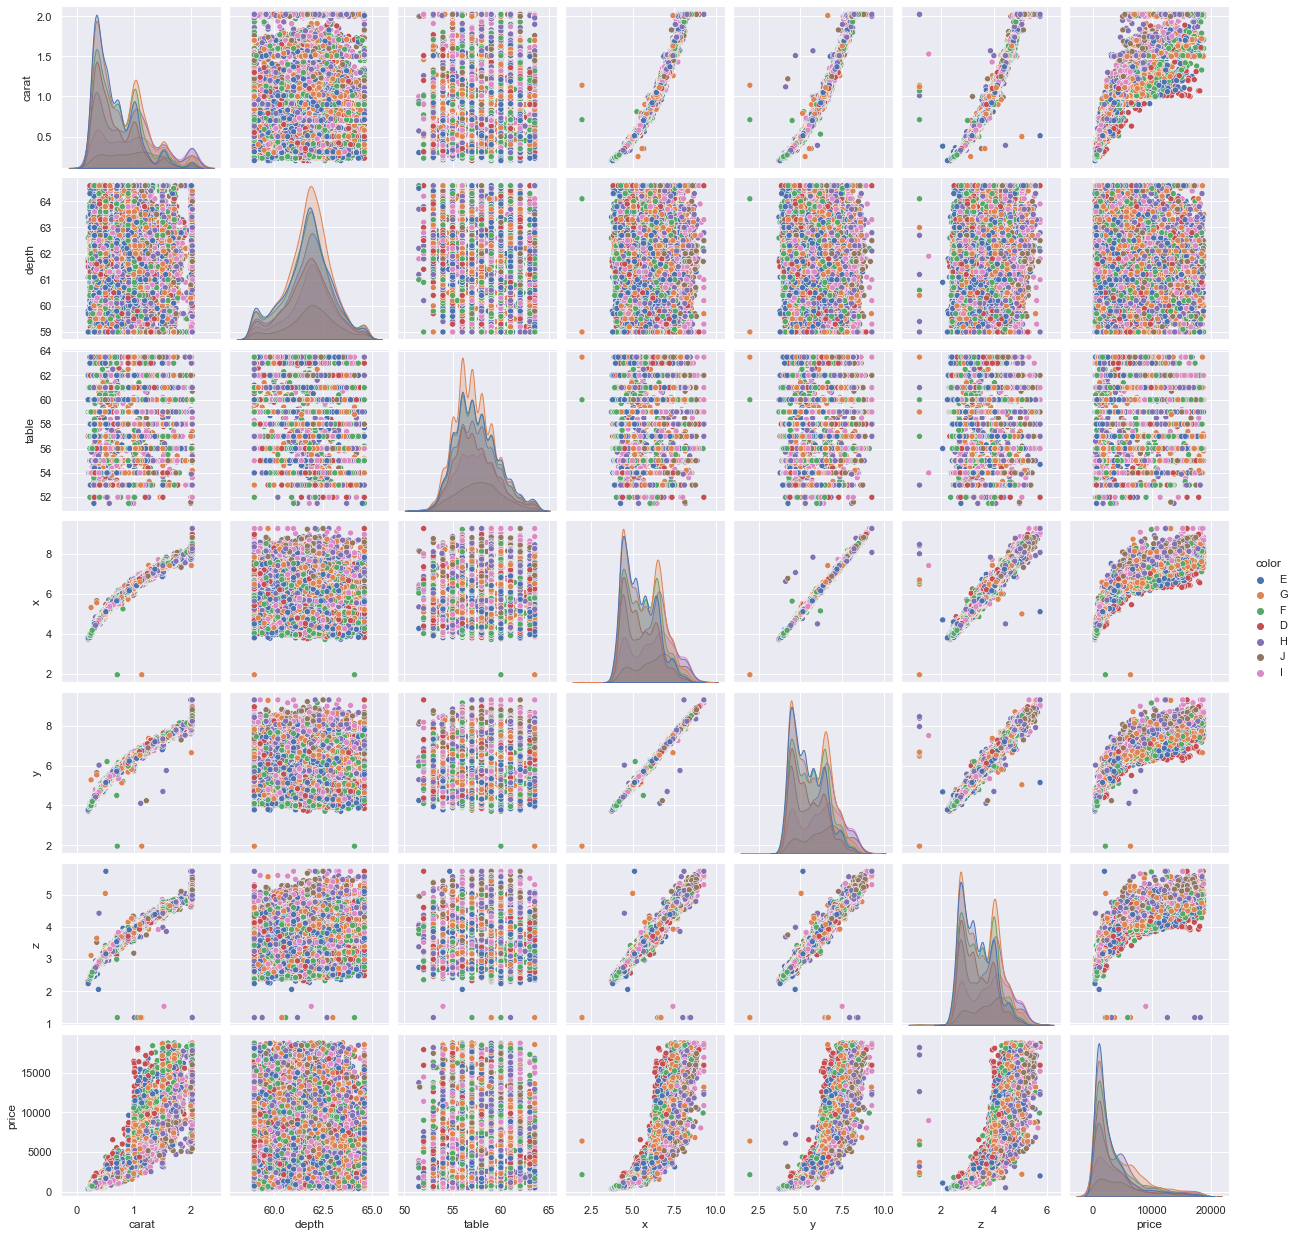

In [77]:
sns.pairplot(cubic_data1, hue = 'color')
plt.show()

<AxesSubplot:xlabel='cut', ylabel='price'>

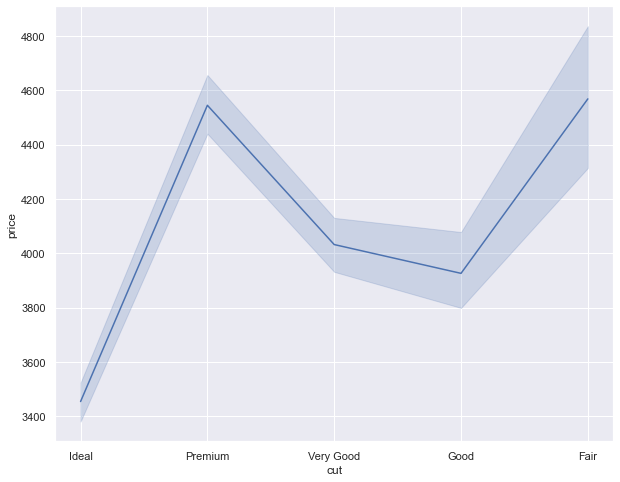

In [71]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'cut' , y = 'price' , data=cubic_data1)

##### Premium and fair cuts are expensive and least expensive is ideal.

<AxesSubplot:xlabel='color', ylabel='price'>

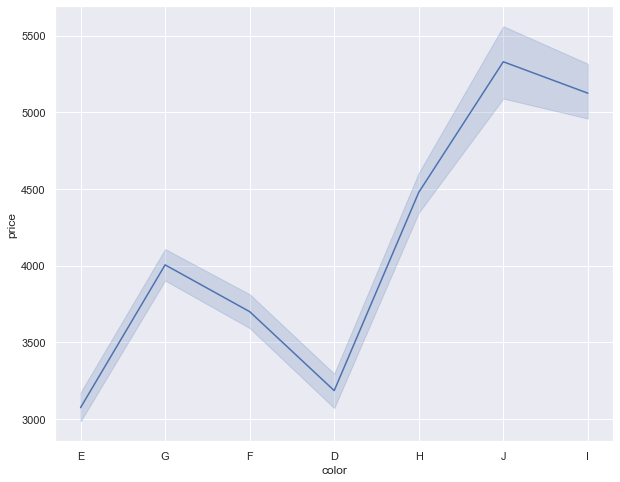

In [72]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'color' , y = 'price' , data=cubic_data1)

##### J color is most expensive and least expensive is E

<AxesSubplot:xlabel='clarity', ylabel='price'>

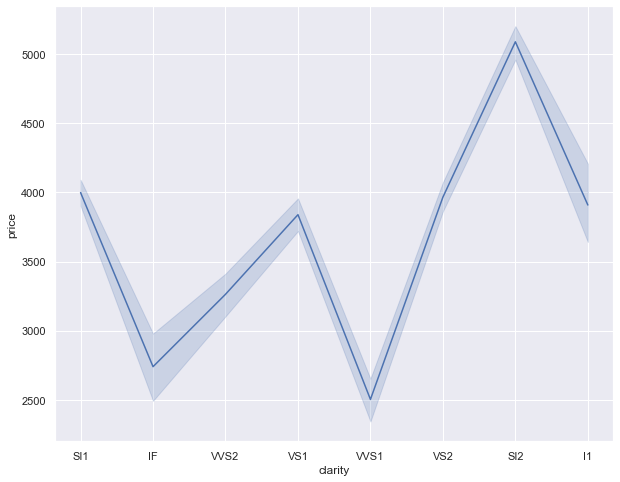

In [73]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'clarity' , y = 'price' , data=cubic_data1)

##### From the figure SI 2 has the highest price and least for WS 1.